# Intro
Ending the HIV Epidemic in the U.S. (EHE) is a bold, whole-of-society initiative coordinated by the U.S. Department of Health and Human Services (HHS). Launched in 2019 and led by the U.S. Department of Health and Human Services (HHS), Ending the HIV Epidemic in the U.S. (EHE) is an ambitious multi-agency and whole-of-society initiative to reduce new HIV infections in the United States by 90% by 2030.
Pillars of EHE: Diagnose, Treat, Prevent, and Respond.
- Diagnose all people with HIV as early as possible
- Treat people with HIV rapidly and effectively to reach sustained viral suppression
- Prevent new HIV transmissions by using proven interventions, including pre-exposure prophylaxis (PrEP) and syringe services programs (SSPs)
    When taken as prescribed, PrEP reduces the risk of getting HIV from sex by about 99% and reduces the risk of getting HIV from injection drug use by at least 74%. 


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns


In [79]:
palette = {'A82331', 'DC5663'}
background_color = '#FFF4EE'
main_color = '#A82331'

In [80]:
nyc_hiv_by_age = pd.read_csv('../data/HIV_AIDS_Diagnoses_by_Neighborhood__Age_Group__and_Race_Ethnicity_20240129.csv')
nyc_hiv_by_age.head()

,YEAR,NEIGHBORHOOD,RACE/ETHNICITY,AGE,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION",Borough
0,2013,High Bridge - Morrisania,Native American,30 - 39,0,0,0,0,0,0,NaN
1,2010,East Harlem,Unknown,40 - 49,0,NaN,0,NaN,0,NaN,NaN
2,2011,High Bridge - Morrisania,Unknown,40 - 49,0,NaN,0,NaN,0,NaN,NaN
3,2012,Greenwich Village - SoHo,Native American,50 - 59,0,0,0,0,0,0,NaN
4,2011,Long Island City - Astoria,Multiracial,20 - 29,0,0,0,0,0,0,NaN


In [81]:
nyc_hiv_by_age = nyc_hiv_by_age[['YEAR', 'NEIGHBORHOOD', 'RACE/ETHNICITY', 'AGE', 'TOTAL NUMBER OF HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION', 'Borough']]

In [82]:

nyc_hiv_by_age['TOTAL NUMBER OF HIV DIAGNOSES'] = nyc_hiv_by_age['TOTAL NUMBER OF HIV DIAGNOSES'].replace('*', 0)
nyc_hiv_by_age['TOTAL NUMBER OF HIV DIAGNOSES'] = nyc_hiv_by_age['TOTAL NUMBER OF HIV DIAGNOSES'].astype('float')
nyc_hiv_by_age['HIV DIAGNOSES PER 100,000 POPULATION'] = nyc_hiv_by_age['HIV DIAGNOSES PER 100,000 POPULATION'].replace('*', 0)
nyc_hiv_by_age['HIV DIAGNOSES PER 100,000 POPULATION'] = nyc_hiv_by_age['HIV DIAGNOSES PER 100,000 POPULATION'].astype('float')

In [83]:
all_races = nyc_hiv_by_age[nyc_hiv_by_age['RACE/ETHNICITY']=='All']
all_races['YEAR'].unique()

array([2013, 2011, 2012, 2010, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [84]:
# data after 2013 also seems to be grouped by borough, which is not the case for the data before.
all_hoods = all_races[(all_races['NEIGHBORHOOD'] == 'All') & (all_races.AGE == 'All') & (all_races.Borough.isna() | (all_races.Borough == 'All')) ]
all_hoods.sort_values(by='YEAR').head(15)

,YEAR,NEIGHBORHOOD,RACE/ETHNICITY,AGE,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",Borough
3687,2010,All,All,All,3353.0,40.6,NaN
2747,2011,All,All,All,3225.0,39.0,NaN
1028,2012,All,All,All,2990.0,35.8,NaN
2504,2013,All,All,All,2832.0,33.7,NaN
8640,2016,All,All,All,2235.0,31.2,All
10416,2017,All,All,All,2073.0,29.1,All
12192,2018,All,All,All,1902.0,26.8,All
13968,2019,All,All,All,1762.0,24.9,All
15744,2020,All,All,All,1394.0,19.9,All
17520,2020,All,All,All,1429.0,19.2,All


In [85]:
nyc_hiv_by_sex_race = pd.read_csv('../data/HIV_AIDS_Diagnoses_by_Neighborhood__Sex__and_Race_Ethnicity_20240129.csv')
nyc_hiv_by_sex_race.head()

,YEAR,Borough,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,NaN,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,NaN,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,NaN,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,NaN,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,NaN,Willowbrook,Male,Unknown,0,0,0,0,0,0


In [86]:
nyc_hiv_by_sex_race.YEAR.unique()

array([2010, 2011, 2012, 2013, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [87]:
annual_report = pd.read_csv('../data/DOHMH_HIV_AIDS_Annual_Report_20240129.csv')
annual_report.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379.0,48.3,640.0,66.0,2366.0,33.8,1.1,71.0,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595.0,79.1,480.0,66.0,1712.0,52.2,1.7,72.0,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733.0,21.1,153.0,66.0,622.0,17.6,0.6,68.0,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51.0,99999.0,7.0,63.0,32.0,99999.0,99999.0,55.0,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47.0,13.6,4.0,64.0,22.0,6.4,0.1,57.0,1,1.4,1.4,0.0


In [88]:
gen_annual_report = annual_report[(annual_report['Borough'] == 'All') & \
                                  (annual_report['Gender'] == 'All') & \
                                  (annual_report['Race'] == 'All') & \
                                  (annual_report['Age'] == 'All')]
gen_annual_report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 26741
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              10 non-null     int64  
 1   Borough                           10 non-null     object 
 2   UHF                               10 non-null     object 
 3   Gender                            10 non-null     object 
 4   Age                               10 non-null     object 
 5   Race                              10 non-null     object 
 6   HIV diagnoses                     10 non-null     float64
 7   HIV diagnosis rate                10 non-null     float64
 8   Concurrent diagnoses              10 non-null     float64
 9   % linked to care within 3 months  10 non-null     float64
 10  AIDS diagnoses                    10 non-null     float64
 11  AIDS diagnosis rate               10 non-null     float64
 12  PLWDHI 

In [89]:
gen_annual_report.head(20)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379.0,48.3,640.0,66.00,2366.0,33.8,1.1,71.00,2040,13.6,5.8,7.8
504,2017,All,All,All,All,All,1837.0,26.3,332.0,0.82,1058.0,15.1,1.1,0.80,1339,6.0,2.0,3.9
1203,2012,All,All,All,All,All,3106.0,44.0,564.0,67.00,2106.0,29.8,1.1,76.00,1898,11.9,4.7,7.2
2406,2013,All,All,All,All,All,2856.0,40.1,583.0,69.00,1949.0,27.4,1.1,78.00,1824,11.1,4.1,7.0
3608,2014,All,All,All,All,All,2749.0,38.3,490.0,70.00,1518.0,21.2,1.1,81.00,1751,10.1,3.3,6.8
4812,2015,All,All,All,All,All,2490.0,34.5,443.0,71.00,1307.0,18.1,1.1,83.00,1678,9.6,99999.0,99999.0
11189,2018,All,All,All,All,All,1694.0,24.2,328.0,0.85,1057.0,15.1,1.1,0.83,1284,6.2,1.8,4.3
16373,2019,All,All,All,All,All,1570.0,22.4,274.0,0.84,966.0,13.8,1.1,0.83,1375,6.5,1.7,4.7
21557,2020,All,All,All,All,All,1291.0,18.5,253.0,0.81,848.0,12.2,1.1,0.83,1906,10.3,1.9,8.2
26741,2021,All,All,All,All,All,1413.0,21.0,285.0,0.82,941.0,14.0,1.2,0.83,1645,8.5,0.0,0.0


In [90]:
gender_annual_report = annual_report[(annual_report['Borough'] == 'All') & \
                                  (annual_report['Year'] == 2021) & \
                                  (annual_report['Race'] == 'All') & \
                                  (annual_report['Gender'].isin(['Men', 'Women'])) & \
                                  (annual_report['Age'] == 'All')]
gender_annual_report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 26777 to 26813
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              2 non-null      int64  
 1   Borough                           2 non-null      object 
 2   UHF                               2 non-null      object 
 3   Gender                            2 non-null      object 
 4   Age                               2 non-null      object 
 5   Race                              2 non-null      object 
 6   HIV diagnoses                     2 non-null      float64
 7   HIV diagnosis rate                2 non-null      float64
 8   Concurrent diagnoses              2 non-null      float64
 9   % linked to care within 3 months  2 non-null      float64
 10  AIDS diagnoses                    2 non-null      float64
 11  AIDS diagnosis rate               2 non-null      float64
 12  PLWD

In [91]:
gender_annual_report

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
26777,2021,All,All,Men,All,All,1123.0,35.4,228.0,0.82,676.0,21.3,1.7,0.83,1138,8.1,0.0,0.0
26813,2021,All,All,Women,All,All,290.0,8.2,57.0,0.82,265.0,7.5,0.7,0.82,507,9.6,0.0,0.0


In [92]:
!pip install pywaffle

In [93]:
from pywaffle import Waffle

In [94]:
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'Montserrat'
#plt.rcParams['font.style'] = 'normal'

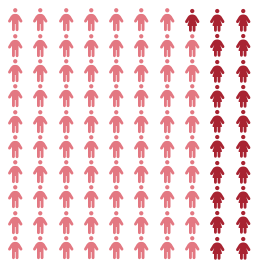

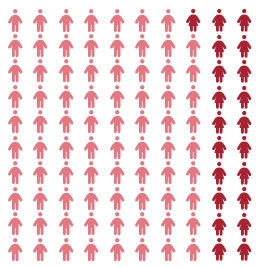

In [95]:
plt.figure(FigureClass=Waffle,
           rows=10,
           columns=10,
           values=gender_annual_report['HIV diagnoses'],
           icons=['person', 'person-dress'],
           colors = ['#E37882', '#A82331'],
           font_size=23,
           #title={"label": "Waffle Title", "loc": "left"}
           )
#ax.set_title('Test Title')

In [96]:
age_annual_report = annual_report[
                                  (annual_report['Borough'] == 'All') & \
                                  (annual_report['Year'] == 2021) & \
                                  (annual_report['Race'] == 'All') & \
                                  (annual_report['Gender']=='All') & \
                                  (annual_report['Age'] != 'All')
                                  ]

age_annual_report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 26747 to 26771
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              5 non-null      int64  
 1   Borough                           5 non-null      object 
 2   UHF                               5 non-null      object 
 3   Gender                            5 non-null      object 
 4   Age                               5 non-null      object 
 5   Race                              5 non-null      object 
 6   HIV diagnoses                     5 non-null      float64
 7   HIV diagnosis rate                5 non-null      float64
 8   Concurrent diagnoses              5 non-null      float64
 9   % linked to care within 3 months  5 non-null      float64
 10  AIDS diagnoses                    5 non-null      float64
 11  AIDS diagnosis rate               5 non-null      float64
 12  PLWD

In [97]:
age_annual_report.head(20)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
26747,2021,All,All,All,18 - 29,All,505.0,36.9,50.0,0.83,123.0,9.0,0.4,0.75,26,4.0,0.0,0.0
26753,2021,All,All,All,30 - 39,All,457.0,33.9,84.0,0.81,276.0,20.5,1.1,0.76,105,6.0,0.0,0.0
26759,2021,All,All,All,40 - 49,All,204.0,19.3,61.0,0.81,183.0,17.3,1.3,0.81,164,7.9,0.0,0.0
26765,2021,All,All,All,50 - 59,All,167.0,15.6,62.0,0.85,201.0,18.8,2.1,0.84,502,9.2,0.0,0.0
26771,2021,All,All,All,60+,All,80.0,4.2,28.0,0.76,158.0,8.4,1.2,0.88,848,10.9,0.0,0.0


([<matplotlib.patches.Wedge at 0x1650b00db50>,
 [Text(0.9914444321773167, 0.47648498182481924, '18 - 29'),
  Text(-0.13174990056566002, -1.0920814821710598, '30 - 39'),
  Text(-1.0998035731832136, 0.020787025122319162, '40 - 49'),
  Text(-0.7311232316325721, 0.8218630178850637, '50 - 59'),
  Text(-0.19462476769107848, 1.08264546357577, '60+')],
 [Text(0.5407878720967181, 0.25990089917717407, '35.7%'),
  Text(-0.07186358212672364, -0.5956808084569416, '32.3%'),
  Text(-0.5998928580999346, 0.011338377339446815, '14.4%'),
  Text(-0.39879448998140293, 0.4482889188463983, '11.8%'),
  Text(-0.1061589641951337, 0.5905338892231472, '5.7%')])

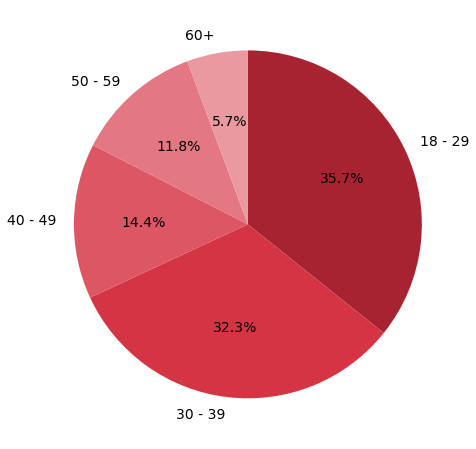

In [98]:
colors = ['#A82331', '#D53444', '#DC5663','#E37882', '#EA99A1']
plt.figure(figsize=(8, 8))
plt.pie(age_annual_report['HIV diagnoses'], labels=age_annual_report['Age'], startangle=90, counterclock=False, autopct='%1.1f%%', textprops={'fontsize': 14}, colors=colors)


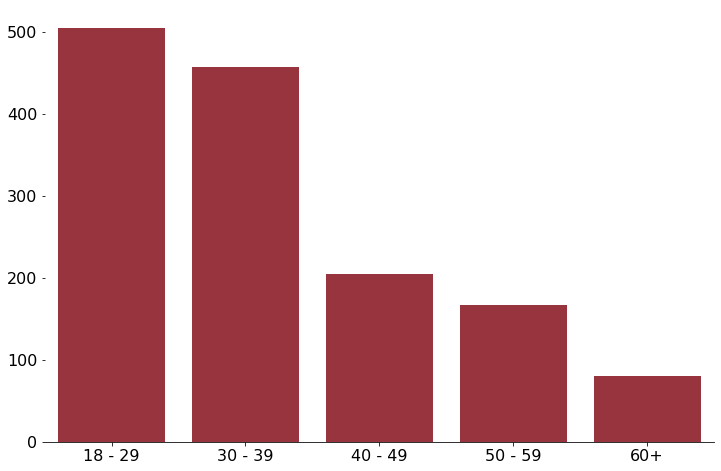

In [99]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=age_annual_report, x='Age', y='HIV diagnoses', palette=['#A82331'], linewidth=0)
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

In [100]:
race_annual_report = annual_report[
                                  (annual_report['Borough'] == 'All') & \
                                  (annual_report['Year'] == 2021) & \
                                  (annual_report['Race'] != 'All') & \
                                  (annual_report['Gender']=='All') & \
                                  (annual_report['Age'] == 'All')
                                  ]

race_annual_report.sort_values(by='HIV diagnoses', inplace=True, ascending=False)
race_annual_report.head()

C:\Users\koste\AppData\Local\Temp\ipykernel_19660\2163200660.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_annual_report.sort_values(by='HIV diagnoses', inplace=True, ascending=False)


,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
26743,2021,All,All,All,All,Black,626.0,42.3,123.0,0.79,461.0,31.2,2.4,0.79,863,10.7,0.0,0.0
26744,2021,All,All,All,All,Latinx/Hispanic,527.0,28.2,109.0,0.84,335.0,17.9,1.5,0.84,539,7.6,0.0,0.0
26746,2021,All,All,All,All,White,161.0,7.3,26.0,0.85,92.0,4.1,0.5,0.90,212,5.3,0.0,0.0
26742,2021,All,All,All,All,Asian/Pacific Islander,82.0,7.8,23.0,0.85,39.0,3.7,0.2,0.89,23,5.0,0.0,0.0
26745,2021,All,All,All,All,Other/Unknown,17.0,14.5,4.0,0.65,14.0,11.9,0.5,0.81,8,6.4,0.0,0.0


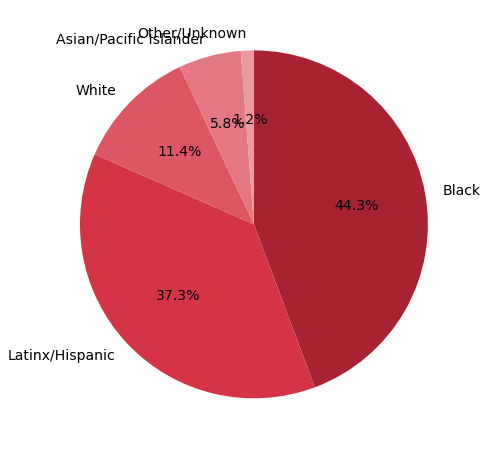

In [101]:
colors = ['#A82331', '#D53444', '#DC5663','#E37882', '#EA99A1']
plt.figure(figsize=(8, 8))
ax = plt.pie(race_annual_report['HIV diagnoses'],
              labels=race_annual_report['Race'], 
              startangle=90, counterclock=False, 
              autopct='%1.1f%%', 
              textprops={'fontsize': 14}, 
              colors=colors)

### How HIV rate and new diagnoses have changed overtime? General and by borough.

In [102]:
# gen_annual_report = annual_report[(annual_report['Borough'] == 'All') & \
#                                   (annual_report['Gender'] == 'All') & \
#                                   (annual_report['Race'] == 'All') & \
#                                   (annual_report['Age'] == 'All')]
gen_annual_report.head(20)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379.0,48.3,640.0,66.00,2366.0,33.8,1.1,71.00,2040,13.6,5.8,7.8
504,2017,All,All,All,All,All,1837.0,26.3,332.0,0.82,1058.0,15.1,1.1,0.80,1339,6.0,2.0,3.9
1203,2012,All,All,All,All,All,3106.0,44.0,564.0,67.00,2106.0,29.8,1.1,76.00,1898,11.9,4.7,7.2
2406,2013,All,All,All,All,All,2856.0,40.1,583.0,69.00,1949.0,27.4,1.1,78.00,1824,11.1,4.1,7.0
3608,2014,All,All,All,All,All,2749.0,38.3,490.0,70.00,1518.0,21.2,1.1,81.00,1751,10.1,3.3,6.8
4812,2015,All,All,All,All,All,2490.0,34.5,443.0,71.00,1307.0,18.1,1.1,83.00,1678,9.6,99999.0,99999.0
11189,2018,All,All,All,All,All,1694.0,24.2,328.0,0.85,1057.0,15.1,1.1,0.83,1284,6.2,1.8,4.3
16373,2019,All,All,All,All,All,1570.0,22.4,274.0,0.84,966.0,13.8,1.1,0.83,1375,6.5,1.7,4.7
21557,2020,All,All,All,All,All,1291.0,18.5,253.0,0.81,848.0,12.2,1.1,0.83,1906,10.3,1.9,8.2
26741,2021,All,All,All,All,All,1413.0,21.0,285.0,0.82,941.0,14.0,1.2,0.83,1645,8.5,0.0,0.0


(0.0, 3879.0)

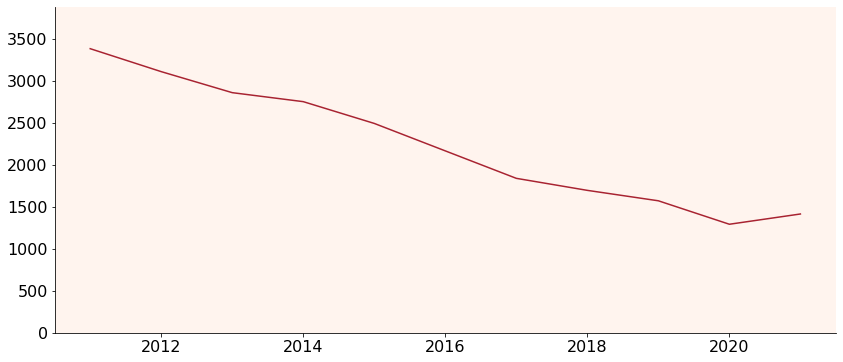

In [103]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=gen_annual_report, y='HIV diagnoses', x='Year', color=main_color)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(background_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0, max(gen_annual_report['HIV diagnoses']) + 500)

(0.0, 58.3)

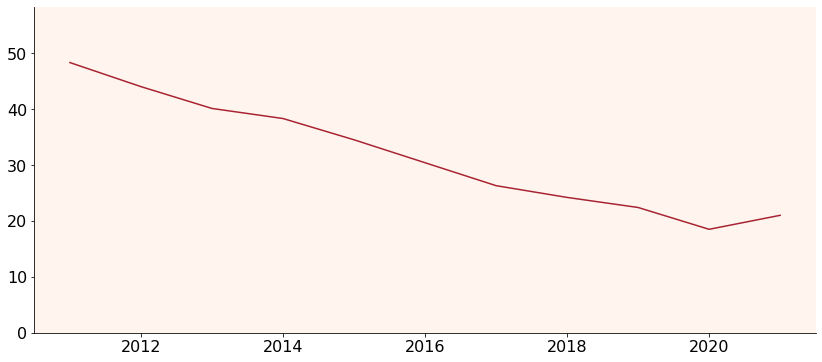

In [104]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=gen_annual_report, y='HIV diagnosis rate', x='Year', color=main_color)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(background_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0, max(gen_annual_report['HIV diagnosis rate']) + 10)

In [105]:
# diagnoses overtime by race
gen_annual_report_race = annual_report[
                                  (annual_report['Borough'] == 'All') & \
                                  (annual_report['Gender']=='All') & \
                                  (annual_report['Age'] == 'All') & \
                                  (annual_report['UHF'] == 'All')
                                  ]
gen_annual_report_race.head(40)


,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379.0,48.3,640.0,66.00,2366.0,33.8,1.1,71.00,2040,13.6,5.8,7.8
504,2017,All,All,All,All,All,1837.0,26.3,332.0,0.82,1058.0,15.1,1.1,0.80,1339,6.0,2.0,3.9
1203,2012,All,All,All,All,All,3106.0,44.0,564.0,67.00,2106.0,29.8,1.1,76.00,1898,11.9,4.7,7.2
2406,2013,All,All,All,All,All,2856.0,40.1,583.0,69.00,1949.0,27.4,1.1,78.00,1824,11.1,4.1,7.0
3608,2014,All,All,All,All,All,2749.0,38.3,490.0,70.00,1518.0,21.2,1.1,81.00,1751,10.1,3.3,6.8
4812,2015,All,All,All,All,All,2490.0,34.5,443.0,71.00,1307.0,18.1,1.1,83.00,1678,9.6,99999.0,99999.0
6016,2017,All,All,All,All,Asian/Pacific Islander,108.0,10.3,26.0,0.78,52.0,5.0,0.2,0.86,14,3.6,1.0,2.5
6017,2017,All,All,All,All,Black,769.0,49.9,150.0,0.80,512.0,33.2,2.3,0.76,697,7.4,2.5,4.7
6018,2017,All,All,All,All,Latinx/Hispanic,675.0,35.2,112.0,0.82,346.0,18.0,1.4,0.81,453,5.7,1.8,3.8
6019,2017,All,All,All,All,Other/Unknown,25.0,22.0,7.0,0.88,13.0,11.4,0.5,0.73,10,6.6,1.7,5.0


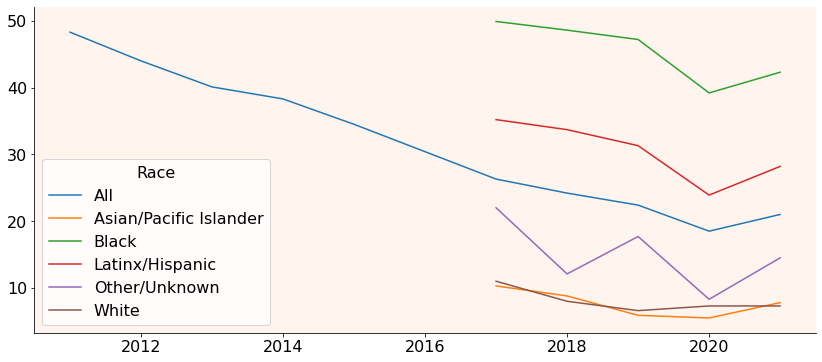

In [106]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=gen_annual_report_race, y='HIV diagnosis rate', x='Year',hue='Race', color=main_color)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(background_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.ylim(0, max(gen_annual_report['HIV diagnosis rate']) + 10)

In [107]:
gen_annual_report_borough = annual_report[(annual_report['Borough'] != 'All') & \
                                  (annual_report['Gender'] == 'All') & \
                                  (annual_report['Race'] == 'All') & \
                                  (annual_report['Age'] == 'All') & \
                                  (annual_report['UHF'] == 'All')]
gen_annual_report_borough.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 26 to 31385
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              50 non-null     int64  
 1   Borough                           50 non-null     object 
 2   UHF                               50 non-null     object 
 3   Gender                            50 non-null     object 
 4   Age                               50 non-null     object 
 5   Race                              50 non-null     object 
 6   HIV diagnoses                     50 non-null     float64
 7   HIV diagnosis rate                50 non-null     float64
 8   Concurrent diagnoses              50 non-null     float64
 9   % linked to care within 3 months  50 non-null     float64
 10  AIDS diagnoses                    50 non-null     float64
 11  AIDS diagnosis rate               50 non-null     float64
 12  PLWDHI

In [108]:
gen_annual_report_borough[gen_annual_report_borough['Borough'] == 'Bronx']

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
26,2011,Bronx,All,All,All,All,627.0,55.3,144.0,73.00,568.0,50.1,1.7,67.00,513,15.0,6.9,8.1
1229,2012,Bronx,All,All,All,All,566.0,49.4,106.0,72.00,470.0,41.0,1.8,73.00,490,13.3,5.0,8.3
2432,2013,Bronx,All,All,All,All,536.0,46.3,108.0,73.00,427.0,36.9,1.8,74.00,485,12.4,4.5,7.9
3634,2014,Bronx,All,All,All,All,507.0,43.3,90.0,70.00,348.0,29.7,1.9,77.00,489,12.1,3.7,8.4
4838,2015,Bronx,All,All,All,All,500.0,42.3,97.0,74.00,290.0,24.5,1.9,80.00,453,10.7,99999.0,99999.0
6115,2017,Bronx,All,All,All,All,433.0,38.3,74.0,0.84,299.0,26.5,2.1,0.74,440,6.5,1.8,4.6
11297,2018,Bronx,All,All,All,All,418.0,36.9,78.0,0.85,337.0,29.7,2.1,0.79,479,7.4,1.9,5.4
16481,2019,Bronx,All,All,All,All,459.0,40.5,86.0,0.85,322.0,28.4,2.1,0.79,460,6.6,1.7,4.7
21665,2020,Bronx,All,All,All,All,300.0,27.1,47.0,0.80,249.0,22.5,2.1,0.79,692,11.7,2.1,9.6
26849,2021,Bronx,All,All,All,All,366.0,33.9,70.0,0.84,295.0,27.3,2.2,0.78,623,11.5,0.0,0.0


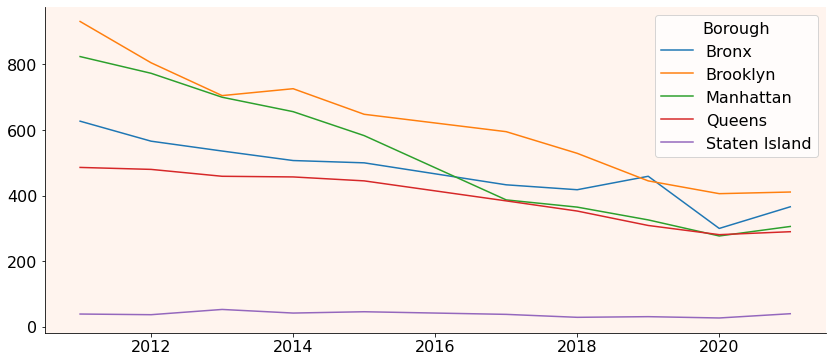

In [109]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=gen_annual_report_borough, y='HIV diagnoses', x='Year', hue='Borough')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(background_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.ylim(0, max(gen_annual_report_borough['HIV diagnoses']))

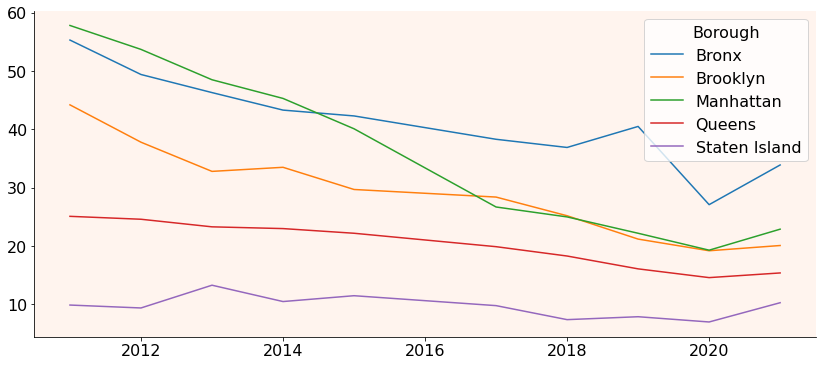

In [110]:
#same plot but with the rate instead
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=gen_annual_report_borough, y='HIV diagnosis rate', x='Year', hue='Borough')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_facecolor(background_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.ylim(0, max(gen_annual_report_borough['HIV diagnoses']))

### Testing overtime

In [111]:
testing_nys = pd.read_csv('../data/BRFSS_nystate.csv')
testing_nys.columns

Index(['Year', 'Locationabbr', 'Locationdesc', 'Class', 'Topic', 'Question',
       'Response', 'Break_Out', 'Break_Out_Category', 'Sample_Size',
       'Data_value', 'Confidence_limit_Low', 'Confidence_limit_High',
       'Display_order', 'Data_value_unit', 'Data_value_type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'DataSource',
       'ClassId', 'TopicId', 'LocationID', 'BreakoutID', 'BreakOutCategoryID',
       'QuestionID', 'ResponseID', 'GeoLocation'],
      dtype='object')

In [112]:
testing_nys = testing_nys[['Year', 'Question',
       'Response', 'Break_Out', 'Break_Out_Category', 'Sample_Size',
       'Data_value', ]]
testing_nys = testing_nys[(testing_nys.Break_Out == 'Overall') & \
                          (testing_nys.Break_Out_Category == 'Overall') & \
                          (testing_nys.Response == 'Yes')]
testing_nys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 470
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                10 non-null     int64  
 1   Question            10 non-null     object 
 2   Response            10 non-null     object 
 3   Break_Out           10 non-null     object 
 4   Break_Out_Category  10 non-null     object 
 5   Sample_Size         10 non-null     int64  
 6   Data_value          10 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 640.0+ bytes


In [113]:
testing_nys.head()

,Year,Question,Response,Break_Out,Break_Out_Category,Sample_Size,Data_value
0,2022,Have you ever been tested for HIV?,Yes,Overall,Overall,6380,45.6
56,2021,Have you ever been tested for HIV?,Yes,Overall,Overall,13820,46.3
125,2020,Have you ever been tested for HIV?,Yes,Overall,Overall,5623,47.7
215,2019,Have you ever been tested for HIV?,Yes,Overall,Overall,5293,52.5
216,2018,Have you ever been tested for HIV?,Yes,Overall,Overall,13533,50.6


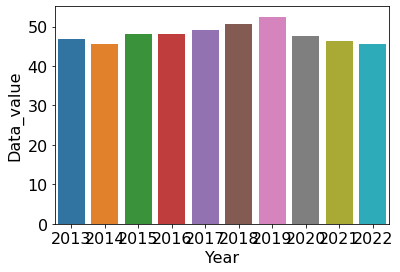

In [114]:
#Percentage of Population Tested Overtime
ax = sns.barplot(data=testing_nys, x='Year', y='Data_value')

In [115]:
#check to see if statistical area has the same trend
testing_sa = pd.read_csv('../data/BRFSS_stat_metroarea.csv')
testing_sa.columns
testing_sa = testing_sa[['Year', 'Question',
       'Response', 'Break_Out', 'Break_Out_Category', 'Sample_Size',
       'Data_value', ]]
testing_sa = testing_sa[(testing_sa.Break_Out == 'Overall') & \
                          (testing_sa.Break_Out_Category == 'Overall') & \
                          (testing_sa.Response == 'Yes')]
testing_sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 15
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                8 non-null      int64  
 1   Question            8 non-null      object 
 2   Response            8 non-null      object 
 3   Break_Out           8 non-null      object 
 4   Break_Out_Category  8 non-null      object 
 5   Sample_Size         8 non-null      int64  
 6   Data_value          8 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 512.0+ bytes


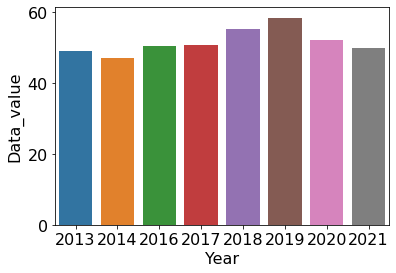

In [116]:
ax = sns.barplot(data=testing_sa, x='Year', y='Data_value')

## Condom distribution

In [123]:
active_con_dis = pd.read_csv('../data/NYC_Condom_Availability_Program_-_HIV_condom_distribution_locations_20240129.csv')
active_con_dis.columns

Index(['Facility PK', 'FacilityName', 'Service Category', 'Service Type',
       'BuildingNumber', 'PartnerType', 'PartnerTypeDetailed', 'Address',
       'Address 2', 'Borough', 'Zipcode', 'Latitude', 'Longitude', 'Phone',
       'AdditionalInfo', 'StartDate', 'EndDate', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Condoms (Male)', 'FC2 (Female/Insertive Condoms)', 'Lubricant',
       'Facility Type', 'Website', 'Community Board', 'Council District',
       'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [124]:
active_con_dis = active_con_dis[['FacilityName','Address',
       'Borough', 'Zipcode', 'Latitude', 'Longitude']]

In [119]:
active_con_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FacilityName         593 non-null    object 
 1   PartnerType          593 non-null    object 
 2   PartnerTypeDetailed  593 non-null    object 
 3   Address              593 non-null    object 
 4   Borough              593 non-null    object 
 5   Zipcode              593 non-null    int64  
 6   Latitude             593 non-null    float64
 7   Longitude            593 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ KB


In [140]:
active_con_dis.drop_duplicates()
active_con_dis.to_csv('../data/clean_active_cond_dist.csv')

In [121]:
active_con_dis.head()

,FacilityName,PartnerType,PartnerTypeDetailed,Address,Borough,Zipcode,Latitude,Longitude
0,CLASSIC FADEZ,Community-Based Organization/Non-Profit,Other,"1455B ST. JOHNS PLACE, BROOKLYN NY 11213",Brooklyn,11213,40.670541,-73.930199
1,El Abuelo Gozon,Business,Night Club,"79-03 Roosevelt Avenue,1st Floor",Queens,11372,40.747360,-73.886564
2,Beauty Bar,Business,Bar/Lounge,231 East 14 Street,Manhattan,10003,40.732951,-73.986361
3,3 Dollar Bill,Business,Bar/Lounge,250 Meserole Street,Brooklyn,11206,40.708520,-73.938441
4,Rosa Style (Step Up Barbershop),Community-Based Organization/Non-Profit,Other,21 Avenue C,Manhattan,10009,40.721257,-73.980923


In [128]:
# check on locations by borough
acd_by_borough = active_con_dis[['FacilityName', 'Borough']].groupby('Borough').count().reset_index()
acd_by_borough.head()

,Borough,FacilityName
0,Bronx,104
1,Brooklyn,192
2,Manhattan,208
3,Queens,87
4,Staten Island,2


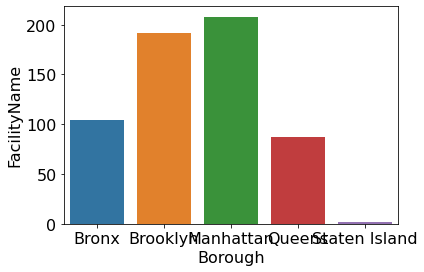

In [129]:
ax = sns.barplot(data=acd_by_borough, x='Borough', y='FacilityName')

### Inactive condom distribution

In [130]:
inactive_con_dis = pd.read_csv('../data/NYC_Condom_Availability_Program_-_Inactive_HIV_condom_distribution_locations_20240129.csv')
inactive_con_dis.columns

Index(['FacilityPK', 'FacilityName', 'Facility Type', 'Service Category',
       'Service Type', 'BuildingNumber', 'Address', 'Address 2', 'Borough',
       'Zipcode', 'Latitude', 'Longitude', 'Phone', 'CommunityBoard',
       'CouncilDistrict', 'CensusTract', 'BIN', 'BBL', 'NTA', 'AdditionalInfo',
       'StartDate', 'EndDate', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Condoms (Male)',
       'FC2 (Female/Insertive Condoms)', 'Lubricant', 'Website', 'PartnerType',
       'PartnerTypeDetailed'],
      dtype='object')

In [131]:
inactive_con_dis = inactive_con_dis[['FacilityName',  'Borough',
       'Zipcode', 'Latitude', 'Longitude']]

In [132]:
inactive_con_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673598 entries, 0 to 673597
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   FacilityName  673598 non-null  object 
 1   Borough       673085 non-null  object 
 2   Zipcode       673598 non-null  int64  
 3   Latitude      673598 non-null  float64
 4   Longitude     673598 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 25.7+ MB


In [133]:
inactive_con_dis.nunique()

FacilityName    1239
Borough            5
Zipcode          125
Latitude        1315
Longitude       1315
dtype: int64

In [139]:
inactive_con_dis = inactive_con_dis.drop_duplicates()
inactive_con_dis.to_csv('../data/clean_inactive_cond_dist.csv')

In [ ]:
icd_by_borough = inactive_con_dis[['FacilityPK', 'Borough']].groupby('Borough').count()
icd_by_borough.head()

,FacilityPK
Borough,
Bronx,101401
Brooklyn,191802
Manhattan,270093
Queens,102294
Staten Island,7495


In [137]:
icd_by_borough = inactive_con_dis[['FacilityName', 'Borough']].groupby('Borough').count().reset_index()
icd_by_borough.head()

,Borough,FacilityName
0,Bronx,210
1,Brooklyn,325
2,Manhattan,412
3,Queens,179
4,Staten Island,25


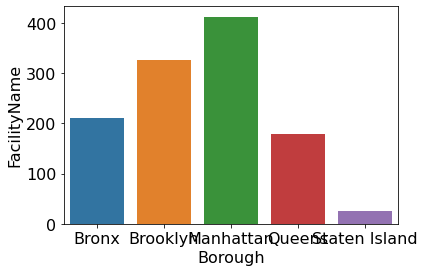

In [138]:
ax = sns.barplot(data=icd_by_borough, x='Borough', y='FacilityName')

### Syringe distribution

In [ ]:
syringe_df = pd.read_csv('../data/syringe.csv')
syringe_df = syringe_df[syringe_df.Year >= 2011]
syringe_df

,Year,tot_syr_dist,tot_syr_dist_by_peers,percent_by_peers
3,2011,2227343,518965,23.30
4,2012,2661080,835796,31.41
5,2013,2757284,841868,30.53
6,2014,2955422,900987,30.49
7,2015,3347388,933314,27.88
8,2016,3495171,799078,22.86
9,2017,4188604,859576,20.52
10,2018,4500926,992426,22.05


<AxesSubplot:xlabel='Year', ylabel='tot_syr_dist'>

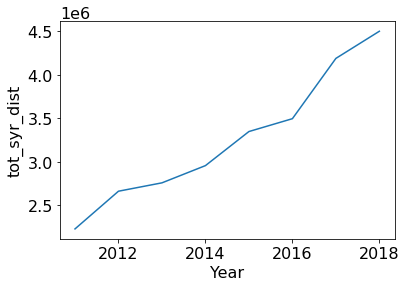

In [ ]:
sns.lineplot(data=syringe_df, x='Year', y='tot_syr_dist')